<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration

In [114]:
from google.colab import files  
uploaded = files.upload()

Saving HW3_movie_metadata.csv to HW3_movie_metadata (2).csv


In [115]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['HW3_movie_metadata.csv']))

In [116]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [117]:
df.tail()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [119]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [120]:
df['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [121]:
df['imdb_score'].sort_values().value_counts(sort=False)

1.6    1
1.7    1
1.9    3
2.0    2
2.1    3
      ..
9.0    3
9.1    3
9.2    1
9.3    1
9.5    1
Name: imdb_score, Length: 78, dtype: int64

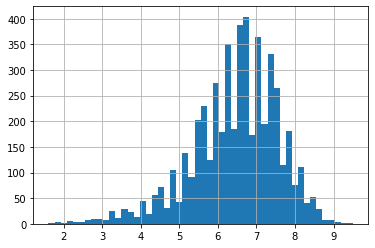

In [122]:
df['imdb_score'].hist(bins=50)

In [123]:
df.isna()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False
5039,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


# Preprocessing

In [141]:
df2 = df.copy()

In [142]:
df2 = df2.dropna(subset = ['imdb_score'])

In [143]:
df2 = df2._get_numeric_data()

In [144]:
df2 = df2.fillna(df2.median())

In [145]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     5043 non-null   float64
 1   duration                   5043 non-null   float64
 2   director_facebook_likes    5043 non-null   float64
 3   actor_3_facebook_likes     5043 non-null   float64
 4   actor_1_facebook_likes     5043 non-null   float64
 5   gross                      5043 non-null   float64
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   facenumber_in_poster       5043 non-null   float64
 9   num_user_for_reviews       5043 non-null   float64
 10  budget                     5043 non-null   float64
 11  title_year                 5043 non-null   float64
 12  actor_2_facebook_likes     5043 non-null   float64
 13  imdb_score                 5043 non-null   float

In [151]:
lo_bound = df2['imdb_score'].quantile(0.4)
hi_bound = df2['imdb_score'].quantile(0.6)
print(lo_bound, hi_bound)

6.3 6.8


In [173]:
lo_data = df2[df2['imdb_score'] <= lo_bound]
lo_data['imdb_score'].loc[:] = 0 #LOW
hi_data = df2[df2['imdb_score'] >= hi_bound]
hi_data['imdb_score'].loc[:] = 1 #HIGH
df3 = pd.concat([lo_data, hi_data], axis=0)
df3['imdb_score'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1.0    2133
0.0    2115
Name: imdb_score, dtype: int64

In [174]:
X = df3.drop(columns='imdb_score')
y = df3['imdb_score']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 6 to 5039
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4248 non-null   float64
 1   duration                   4248 non-null   float64
 2   director_facebook_likes    4248 non-null   float64
 3   actor_3_facebook_likes     4248 non-null   float64
 4   actor_1_facebook_likes     4248 non-null   float64
 5   gross                      4248 non-null   float64
 6   num_voted_users            4248 non-null   int64  
 7   cast_total_facebook_likes  4248 non-null   int64  
 8   facenumber_in_poster       4248 non-null   float64
 9   num_user_for_reviews       4248 non-null   float64
 10  budget                     4248 non-null   float64
 11  title_year                 4248 non-null   float64
 12  actor_2_facebook_likes     4248 non-null   float64
 13  aspect_ratio               4248 non-null   float

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=100)

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [177]:
train=X_train.copy()
train['target']=y_train
train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,target
0,0.009852,0.203762,0.000000,0.000000,0.000019,0.038740,0.000194,0.000018,0.000000,0.001929,0.000090,0.97,0.000000,0.069530,0.000573,NaN
1,0.056650,0.260188,0.011727,0.018435,0.001127,0.017471,0.001875,0.003735,0.133333,0.003858,0.001883,0.92,0.003380,0.069530,0.001077,1.0
2,0.412562,0.398119,0.000000,0.043478,0.020313,0.025762,0.047851,0.042326,0.266667,0.092156,0.002047,0.97,0.080292,0.069530,0.068768,1.0
3,0.279557,0.319749,0.006818,0.002565,0.000830,0.158475,0.062992,0.001163,0.266667,0.048435,0.012689,0.94,0.000599,0.030675,0.031519,1.0
4,0.534483,0.366771,0.000000,0.035913,0.006250,0.055234,0.116927,0.010761,0.266667,0.196528,0.006713,0.95,0.014599,0.069530,0.120344,NaN


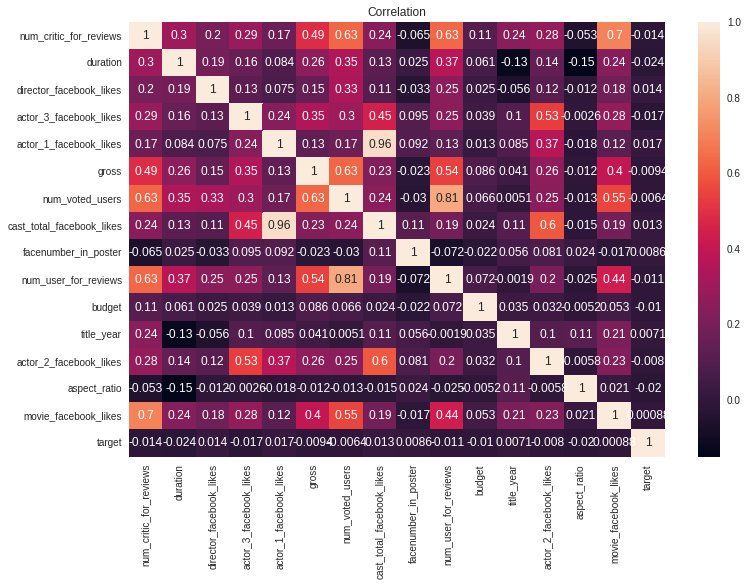

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.title("Correlation")
plt.show()

**Correlation Results:** We used MinMaxScaler, so the correlation is different from last week. We can see that all non-categorical features are weakly correlated with the target, so we only cut out features that are colinear.

We choose maximum allowed correlation between features to be 0.8.

*The autocorrelations are:*
* `actor_1_facebook_likes` and `cast_total_facebook_likes`
* `num_voted_users` and `num_user_for_reviews`

We choose to cut features `actor_1_facebook_likes` and `num_user_for_reviews`.

In [179]:
X_train = X_train.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])
X_test = X_test.drop(columns=['actor_1_facebook_likes', 'num_user_for_reviews'])

# Modelling

In [180]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Classification Report:
               precision    recall  f1-score   support

         LOW       0.69      0.79      0.74       634
        HIGH       0.76      0.65      0.70       641

    accuracy                           0.72      1275
   macro avg       0.73      0.72      0.72      1275
weighted avg       0.73      0.72      0.72      1275

Accuracy on train:
 0.718
Accuracy on test:
 0.72


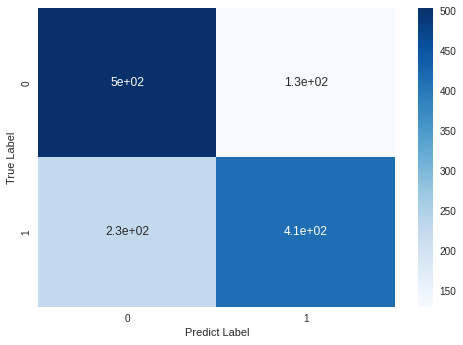

In [181]:
from sklearn import metrics
print("Classification Report:\n", metrics.classification_report(y_test,y_pred,target_names=('LOW', 'HIGH')))
print("Accuracy on train:\n",logr.score(X_train,y_train).round(3))
print("Accuracy on test:\n",logr.score(X_test,y_test).round(3))
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [182]:
print('HIGH = 1, LOW = 0')
for i in range(X_train.shape[1]):
    print(X_train.columns[i], 'has coefficient equal to:\n', logr.coef_[0][i])
print('The intercept is', logr.intercept_)

HIGH = 1, LOW = 0
num_critic_for_reviews has coefficient equal to:
 2.6768856773917094
duration has coefficient equal to:
 3.160265194895993
director_facebook_likes has coefficient equal to:
 1.3138565316987407
actor_3_facebook_likes has coefficient equal to:
 -1.5041058573872241
gross has coefficient equal to:
 -2.373793978265857
num_voted_users has coefficient equal to:
 7.553619395570427
cast_total_facebook_likes has coefficient equal to:
 0.1321485617424522
facenumber_in_poster has coefficient equal to:
 -0.5158743351357447
budget has coefficient equal to:
 -0.0028761568298738224
title_year has coefficient equal to:
 -4.16016338375497
actor_2_facebook_likes has coefficient equal to:
 -0.07599587709936259
aspect_ratio has coefficient equal to:
 1.8338781208964698
movie_facebook_likes has coefficient equal to:
 2.421360541064438
The intercept is [1.9386102]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


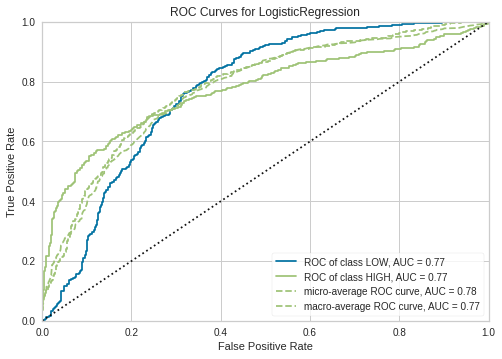

In [183]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logr, classes=('LOW', 'HIGH'))
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   